In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import warnings
import seaborn as sns

In [3]:
df = pd.read_csv("WDI_csv/WDIData.csv").iloc[:, :-1]

# country_df only contains countries, excludes Arab World, Continents and so on...
country_df = df.iloc[67400:]

In [4]:
grps = df.groupby(["Country Code", "Indicator Code"])

In [5]:
grps.groups

{('ABW', 'AG.AGR.TRAC.NO'): [80364], ('ABW', 'AG.CON.FERT.PT.ZS'): [80724], ('ABW', 'AG.CON.FERT.ZS'): [80725], ('ABW', 'AG.LND.AGRI.K2'): [80363], ('ABW', 'AG.LND.AGRI.ZS'): [80362], ('ABW', 'AG.LND.ARBL.HA'): [80395], ('ABW', 'AG.LND.ARBL.HA.PC'): [80394], ('ABW', 'AG.LND.ARBL.ZS'): [80393], ('ABW', 'AG.LND.CREL.HA'): [80993], ('ABW', 'AG.LND.CROP.ZS'): [81278], ('ABW', 'AG.LND.EL5M.RU.K2'): [81491], ('ABW', 'AG.LND.EL5M.RU.ZS'): [81490], ('ABW', 'AG.LND.EL5M.UR.K2'): [81707], ('ABW', 'AG.LND.EL5M.UR.ZS'): [81706], ('ABW', 'AG.LND.EL5M.ZS'): [80992], ('ABW', 'AG.LND.FRST.K2'): [80762], ('ABW', 'AG.LND.FRST.ZS'): [80761], ('ABW', 'AG.LND.IRIG.AG.ZS'): [80361], ('ABW', 'AG.LND.PRCP.MM'): [80403], ('ABW', 'AG.LND.TOTL.K2'): [80991], ('ABW', 'AG.LND.TOTL.RU.K2'): [81489], ('ABW', 'AG.LND.TOTL.UR.K2'): [81705], ('ABW', 'AG.LND.TRAC.ZS'): [80365], ('ABW', 'AG.PRD.CREL.MT'): [80443], ('ABW', 'AG.PRD.CROP.XD'): [80585], ('ABW', 'AG.PRD.FOOD.XD'): [80754], ('ABW', 'AG.PRD.LVSK.XD'): [81012], 

In [6]:
# grps.agg(lambda x: 100 * sum(x.isnull()) / len(x)).plot.box()

In [7]:
nan_df = pd.DataFrame()
for col in df:
  nan_df[col] = [sum(df[col].isnull()) / len(df[col]) * 100]
nan_df = nan_df.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])

<AxesSubplot:xlabel='Year', ylabel='Missing Values %'>

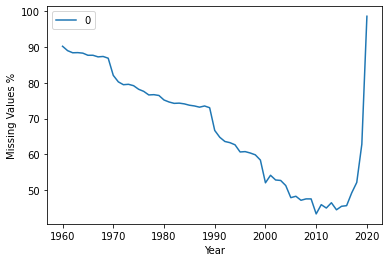

In [8]:
nan_df.T.plot.line(xlabel="Year", ylabel="Missing Values %")

In [9]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378571,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.900000,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN
378572,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.4,NaN
378573,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.500000,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.7,NaN
378574,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.000000,59.200000,59.300000,59.400000,59.400000,59.500000,59.500000,59.600000,59.6,NaN


In [10]:
def get_indicator_data(df: pd.DataFrame, indicator_code: str):
    return df[df["Indicator Code"] == indicator_code]\
        .drop(columns=["Indicator Code", "Indicator Name", "Country Name"])\
        .set_index("Country Code")

In [11]:
def get_country_data(df: pd.DataFrame, country_code: str):
    return df[df["Country Code"] == country_code]\
        .drop(columns=["Country Code", "Country Name", "Indicator Name"])\
        .set_index("Indicator Code")

In [12]:
def get_year_data(df: pd.DataFrame, year: str):
    new_df = df[["Country Code", "Indicator Code", year]]
    ret_df = pd.DataFrame()
    for indicator_code, indicator_df in new_df.groupby("Indicator Code"):
        series = indicator_df.set_index("Country Code")[year]
        ret_df[indicator_code] = series
    return ret_df

In [13]:
def get_indicator_name(df, indicator_code):
  # Very, very inefficient. Fix by keeping a mapping of code to name
  return df[df["Indicator Code"] == indicator_code]["Indicator Name"].iloc[0]

In [14]:
def get_country_name(df, country_code):
  # Very, very inefficient. Fix by keeping a mapping of code to name
  return df[df["Country Code"] == country_code]["Country Name"].iloc[0]

In [35]:
country_df = pd.read_csv("WDI_csv/WDICountry.csv", usecols=["Country Code", "Income Group", "Region"]).set_index("Country Code")

{'High income': ['ABW', 'AND', 'ARE', 'ATG', 'AUS', 'AUT', 'BEL', 'BHR', 'BHS', 'BMU', 'BRB', 'BRN', 'CAN', 'CHE', 'CHI', 'CHL', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'FRO', 'GBR', 'GIB', 'GRC', 'GRL', 'GUM', 'HKG', 'HRV', 'HUN', 'IMN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KNA', 'KOR', 'KWT', 'LIE', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MCO', 'MLT', 'MNP', 'MUS', 'NCL', 'NLD', 'NOR', 'NRU', 'NZL', 'OMN', 'PAN', 'PLW', 'POL', 'PRI', 'PRT', 'PYF', 'QAT', 'ROU', 'SAU', 'SGP', 'SMR', 'SVK', 'SVN', 'SWE', 'SXM', 'SYC', 'TCA', 'TTO', 'URY', 'USA', 'VGB', 'VIR'], 'Low income': ['AFG', 'BDI', 'BFA', 'CAF', 'COD', 'ERI', 'ETH', 'GIN', 'GMB', 'GNB', 'HTI', 'LBR', 'MDG', 'MLI', 'MOZ', 'MWI', 'NER', 'PRK', 'RWA', 'SDN', 'SLE', 'SOM', 'SSD', 'SYR', 'TCD', 'TGO', 'TJK', 'UGA', 'YEM'], 'Lower middle income': ['AGO', 'BEN', 'BGD', 'BOL', 'BTN', 'CIV', 'CMR', 'COG', 'COM', 'CPV', 'DJI', 'DZA', 'EGY', 'FSM', 'GHA', 'HND', 'IND', 'KEN', 'KGZ', 'KHM', 'KIR', 'LAO', 'LKA', 'LSO

In [16]:
get_year_data(df, "2018")

,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Code,,,,,,,,,,,,,,,,,,,,,
ARB,NaN,NaN,NaN,NaN,NaN,NaN,0.140368,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSS,NaN,NaN,NaN,NaN,NaN,NaN,0.102596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEB,NaN,NaN,NaN,NaN,NaN,NaN,0.355118,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EAR,NaN,NaN,NaN,NaN,NaN,NaN,0.134060,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EAS,NaN,NaN,NaN,NaN,NaN,NaN,0.100765,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIR,NaN,NaN,NaN,NaN,NaN,NaN,0.009348,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,0.038518,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def filter_df(df, ge_year=None, le_year=None, nan_thresh=None, particular_year = None):
  if nan_thresh is not None:
    na_kwargs = {"thresh": nan_thresh}
  else:
    na_kwargs = {}
  df = df.dropna(axis=0, how='all').dropna(axis=1, how='all').dropna(axis=1, **na_kwargs).iloc[:, :-1]
  if ge_year is not None:
    df = df.loc[:, df.columns >= ge_year]
  if le_year is not None:
    df = df.loc[:, df.columns <= le_year]
  if particular_year is not None:
    df = df.loc[:, df.columns == particular_year]
  return df

In [18]:
import matplotlib.pyplot as plt

def plot_indicator_box_across_years(df, indicator_code, **kwargs):
  ind_df = filter_df(get_indicator_data(df, indicator_code), **kwargs)   
  fig, ax = plt.subplots()
  ax.set_xlabel("Year")
  ax.set_ylabel(get_indicator_name(df, indicator_code))
  #print(ind_df.shape)
  sns.boxplot(data=ind_df, ax=ax)
  ax.set_title("Trend Over the Years")
  fig.savefig('boxYears.png',dpi = 200)

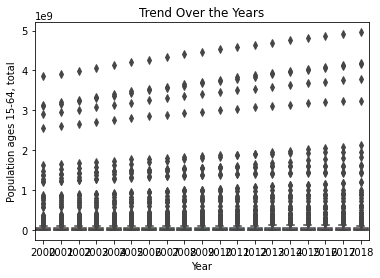

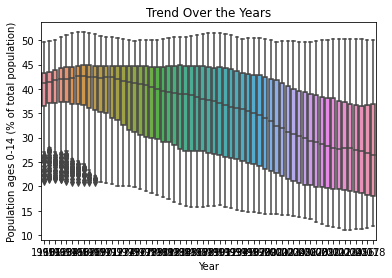

In [19]:
plot_indicator_box_across_years(df, "SP.POP.1564.TO", ge_year="2000",nan_thresh = 200)
plot_indicator_box_across_years(df, "SP.POP.0014.TO.ZS", nan_thresh=220)

In [20]:
def plot_indicator_some_countries(df, indicator_code, countries, **kwargs):
  tmp = df.loc[(df["Country Code"].isin(countries)) & (df["Indicator Code"] == indicator_code)].set_index("Country Name").iloc[:, 3:]
  tmp = filter_df(tmp, **kwargs)

  fig, ax = plt.subplots()
  ax.set_xlabel("Year")
  ax.set_ylabel(get_indicator_name(df, indicator_code))
  sns.lineplot(data=tmp.T, ax=ax)

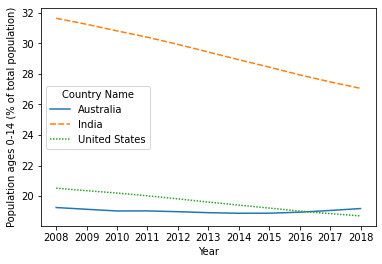

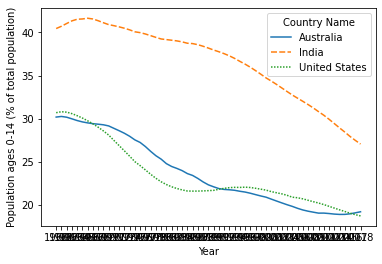

In [21]:
plot_indicator_some_countries(df, "SP.POP.0014.TO.ZS", ["IND", "USA", "AUS"], ge_year="2008")
plot_indicator_some_countries(df, "SP.POP.0014.TO.ZS", ["IND", "USA", "AUS"])

In [22]:
def plot_country_some_indicators(df, country_code, indicators, **kwargs):
  tmp = df.loc[(df["Country Code"] == country_code) & (df["Indicator Code"].isin(indicators))].set_index("Indicator Name").iloc[:, 3:]
  tmp = filter_df(tmp, **kwargs)
  tmp = (tmp - tmp.min()) / tmp.max() # Scale
  
  fig, ax = plt.subplots()
  ax.set_xlabel("Year")
  ax.set_ylabel(get_country_name(df, country_code))
  sns.lineplot(data=tmp.T, ax=ax)

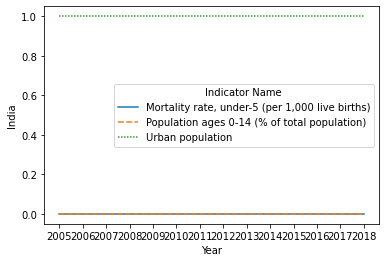

In [23]:
plot_country_some_indicators(df, "IND", ["SP.POP.0014.TO.ZS", "SP.URB.TOTL", "SH.DYN.MORT"], ge_year="2005")

In [24]:
import statsmodels.stats.weightstats as weightstats

In [25]:
def compare_means(ind, year1, year2):
    ind_data = get_indicator_data(df, ind)
    ind1 = weightstats.DescrStatsW(ind_data[str(year1)].dropna())
    ind2 = weightstats.DescrStatsW(ind_data[str(year2)].dropna())
    return weightstats.CompareMeans(ind1, ind2)

In [26]:
import matplotlib.transforms as transforms

def plot_mean_comparison(ind_code, begin_year, end_year):
    fig, ax = plt.subplots()
    means = get_indicator_data(df, ind_code).mean()
    means.loc[[str(year) for year in range(begin_year, end_year)]].plot(ax=ax)
    ax.set_xlabel("year")
    ax.set_ylabel(f"mean {get_indicator_name(df, ind_code)}")

    data = {}
    for year in range(begin_year,end_year):
        data[year] = compare_means(ind_code, begin_year, year).ttest_ind()[1]
    fig, ax = plt.subplots()
    ax.set_xlabel("year")
    ax.set_ylabel("p-value")
    ax.set_title(f"Comparison of mean of {get_indicator_name(df, ind_code)} with year {begin_year}")
    ax.axhline(y=0.05, color='r', linestyle='--')
    trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
    ax.text(0,0.05, "0.05", color="red", transform=trans, 
            ha="right", va="center")
    pd.Series(data).plot(ax=ax, marker='o', color='b')

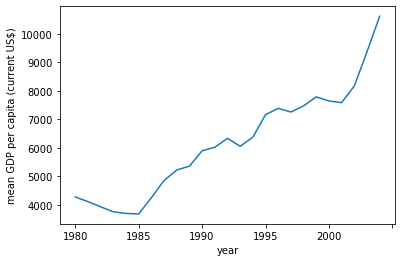

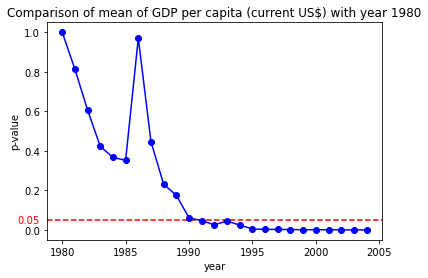

In [27]:
plot_mean_comparison("NY.GDP.PCAP.CD", 1980, 2005)

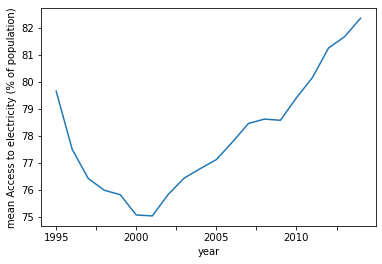

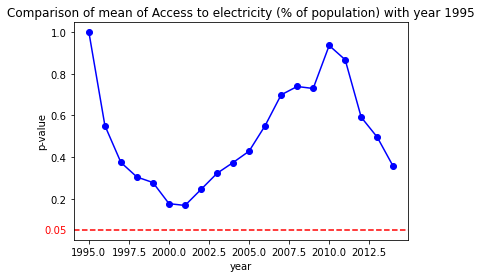

In [28]:
plot_mean_comparison("EG.ELC.ACCS.ZS", 1995, 2015)

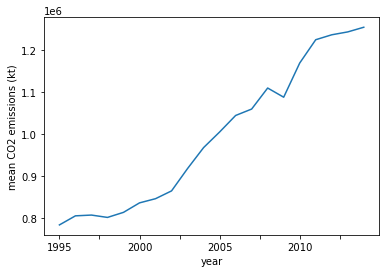

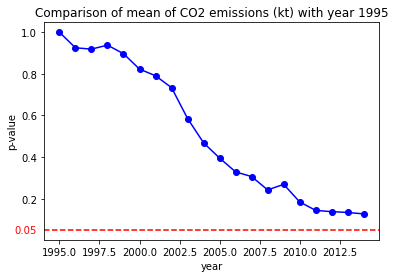

In [29]:
plot_mean_comparison("EN.ATM.CO2E.KT", 1995, 2015)

In [104]:
def divide_wrt_group(ind_code, year, group_name):
    ind_data = get_indicator_data(df, ind_code)[str(year)]
    combined_df = pd.concat([ind_data, country_df], axis=1).dropna()
    arr = []
    ax = sns.boxplot(x=group_name, y=str(year), data=combined_df, showfliers=False)
    ax.set_ylabel(get_indicator_name(df, ind_code))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.tight_layout()
    plt.show()
    for group, group_df in combined_df.groupby(group_name):
        arr.append(group_df.iloc[:, 0]) # Get only numeric data
    return arr

In [107]:
from scipy.stats import f_oneway

def compare_means_group(ind_code, year, group_name):
    df_arr =divide_wrt_group(ind_code, year, group_name)
    return f_oneway(*df_arr)

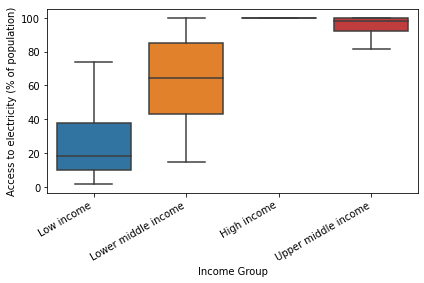

F_onewayResult(statistic=159.10147076807954, pvalue=1.0589776266346509e-53)

In [111]:
compare_means_group("EG.ELC.ACCS.ZS", "2010", "Income Group")

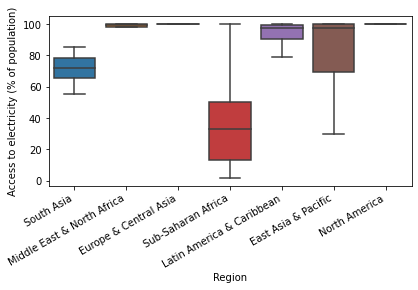

F_onewayResult(statistic=67.11801950865761, pvalue=8.256848787028392e-46)

In [115]:
compare_means_group("EG.ELC.ACCS.ZS", "2010", "Region")

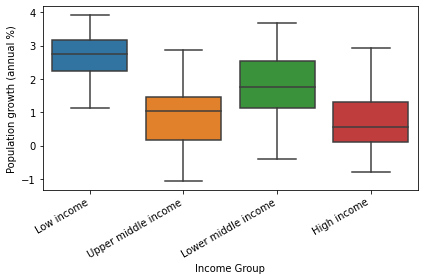

F_onewayResult(statistic=10.949140873662753, pvalue=1.0224958855704851e-06)

In [112]:
compare_means_group("SP.POP.GROW", "2010", "Income Group")

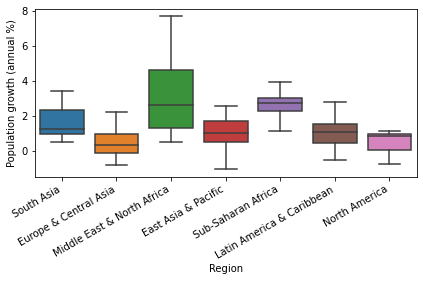

F_onewayResult(statistic=25.03258197248207, pvalue=2.5226587415372283e-22)

In [114]:
compare_means_group("SP.POP.GROW", "2010", "Region")

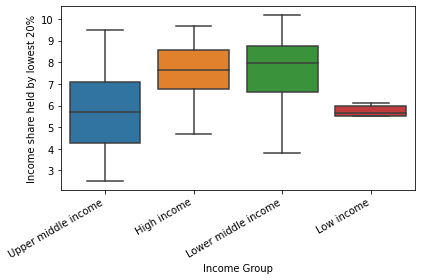

F_onewayResult(statistic=5.991139349964631, pvalue=0.000986807557245028)

In [118]:
compare_means_group("SI.DST.FRST.20", "2010", "Income Group")

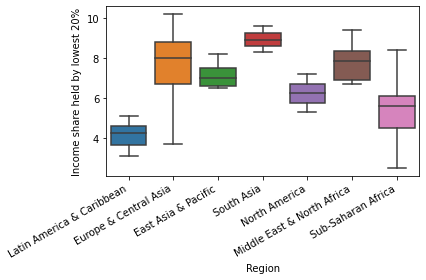

F_onewayResult(statistic=14.499294913286253, pvalue=5.948313961411407e-11)

In [117]:
compare_means_group("SI.DST.FRST.20", "2010", "Region")

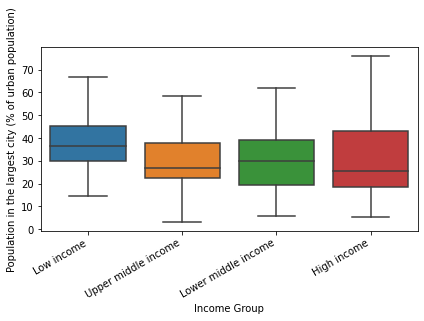

F_onewayResult(statistic=1.6288384525211752, pvalue=0.18513648361013083)

In [126]:
compare_means_group("EN.URB.LCTY.UR.ZS", "2010", "Income Groups")

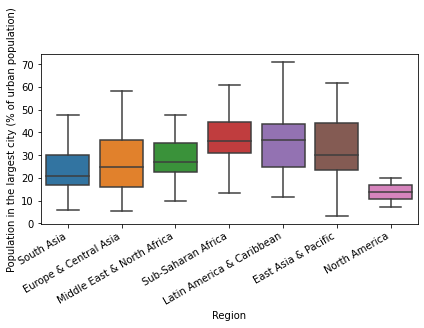

F_onewayResult(statistic=2.8992543013666934, pvalue=0.010630792436883798)

In [125]:
compare_means_group("EN.URB.LCTY.UR.ZS", "2010", "Region")